# 4. Exploratory Data Analysis

 ### EDA?
  - 데이터 그 자체의 특성을 육안으로 확인하는 과정  (데이터의 본질적 의미)
  - 데이터 그 자체만으로부터 인사이트를 얻어내는 접근법 (통계적 수치, 시각화)
 
 
 ### EDA의 Process
  1. 분석의 목적과 변수 확인
    - 분석의 목적(결과)을 명확히
    - 변수(df에서의 column) 각 col이 어떤 의미를 가지며 어떤 데이터 타입인지 데이터 타입이 분석하기에 적절한지
    
  2. 데이터 전체적으로 살펴보기
    - 데이터의 상관관계, 결측치가 없는지, 데이터의 사이즈가 적절한지
    
  3. 데이터의 개별 속성 파악하기
    - 각각의 Feature가 무엇인지 속성이 적절하게 매칭되어있는지, 속성을 바꾸어줄 필요가 있는지

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)


0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비


  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## train.csv
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인
  - 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?
  
  ### 분석의 목적 확인
    - 살아남은 사람들은 어떤 특징을 가지고 있었을까
      1. 데이터의 살아남았는지에 대한 정보
      2. 탑승객의 정보
  
  ### 변수 확인
  
   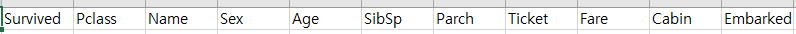

In [4]:
# 상위 5개 데이터 확인

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [8]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()

#수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 상관계수 확인

titanic_df.corr()

## Correlation is NOT Causation

# 상관성 : Aup, Bup, ...
# 인과서 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# 결측치 확인

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

 ### I. Survived Column

In [16]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

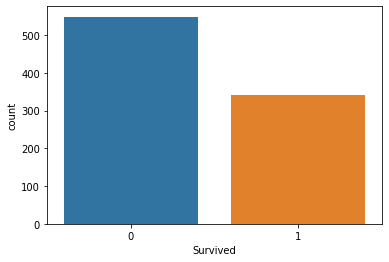

In [18]:
# 생존자 사망자수를 Barplot으로 그려보기 sns.sountplot()

sns.countplot(x = 'Survived', data=titanic_df)
plt.show()

### II. Pclass

In [20]:
# Pclass에 땨른 인원 파악

titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
# 생존자 인원?

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
# 생존 비율

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


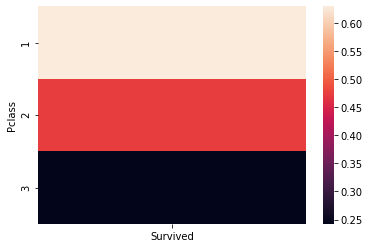

In [24]:
# 히트맵을 활용해서 상관을 확인
sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [28]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

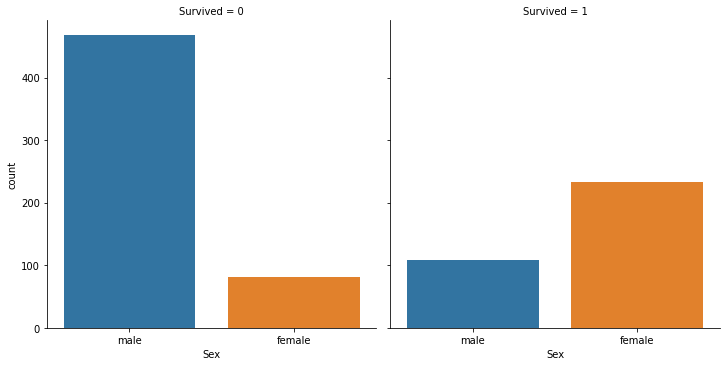

In [32]:
# sns.catplot

sns.catplot(x= 'Sex', col='Survived', kind = 'count', data= titanic_df)
plt.show()

### IV. Age

 ### Remind : 결측치 존재

In [33]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

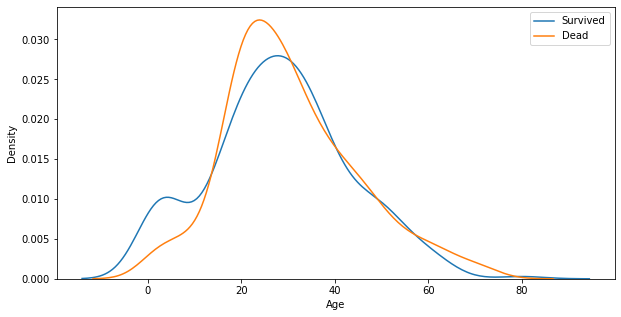

In [38]:
# Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x = titanic_df[titanic_df.Survived == 1]['Age'], ax = ax)
sns.kdeplot(x = titanic_df[titanic_df.Survived == 0]['Age'], ax = ax)

plt.legend(['Survived', 'Dead'])

plt.show()

## Appendix I. Sex + Pclass vs Survived

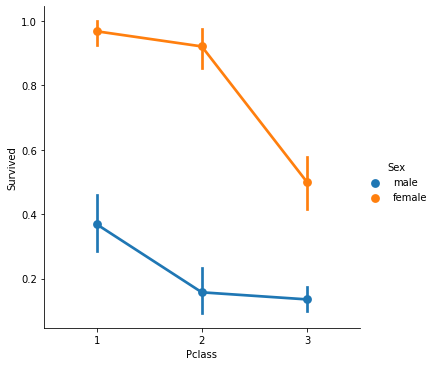

In [41]:
sns.catplot(x ='Pclass', y = 'Survived', hue = 'Sex', kind='point', data = titanic_df)

## Appendix II. Age + Pclass

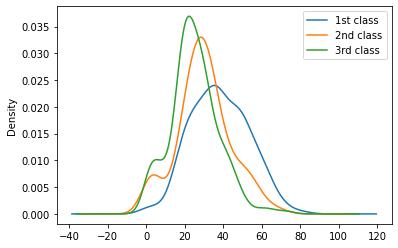

In [45]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

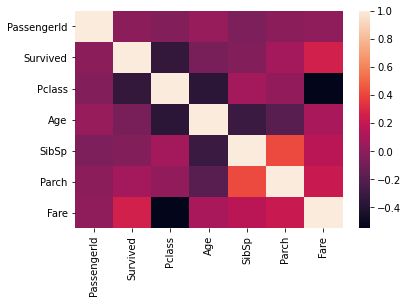

In [93]:
#요금(Fare)과 생존의 상관관계
sns.heatmap(titanic_df.corr())
plt.show()

## 히트맵에서 Fare와 Survived의 상관이 다른 항목(Pclass제외)보다 밝게 보임으로 상관이 있을것으로 예상됨
### *Pclass는 숫자가 낮을수록 높은 등급이기때문에 Fare와의 상관이 없는것으로 보이지만 데이터의 특성에 의해 아닐수도있음

In [98]:
titanic_df['Fare'].sort_values().head(20)
titanic_df['Fare'].sort_values().tail(20)

779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
380    227.5250
557    227.5250
716    227.5250
118    247.5208
299    247.5208
742    262.3750
311    262.3750
27     263.0000
88     263.0000
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, dtype: float64

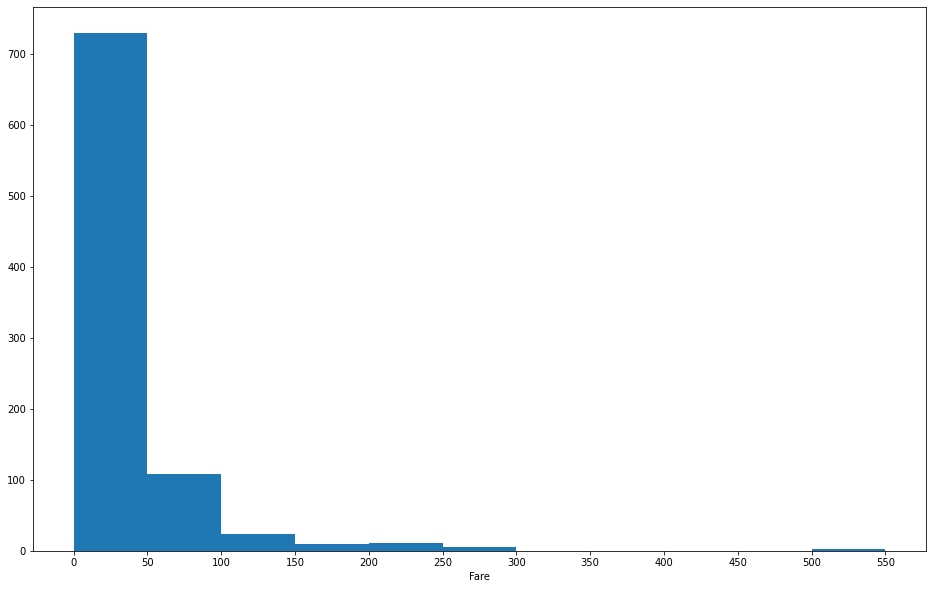

In [100]:
plt.figure(figsize=(16,10))
plt.hist(titanic_df['Fare'], bins=np.arange(0,600,50))
plt.xticks([i for i in range(0,600,50)])
plt.xlabel("Fare")
plt.show()

In [92]:
print(titanic_df['Fare'].mean())

rich_Sur = titanic_df[titanic_df['Survived'] == 1]
rich_ded = titanic_df[titanic_df['Survived'] == 0]

rich_Sur = rich_Sur[rich_Sur['Fare'] > 128]
rich_ded = rich_ded[rich_ded['Fare'] > 128]

print(len(rich_Sur))
print(len(rich_ded))

32.204207968574636
28
10


### 평균 요금의 4배 이상 지불한 사람의 경우 생존자가 사고자 보다 2.8배 많음

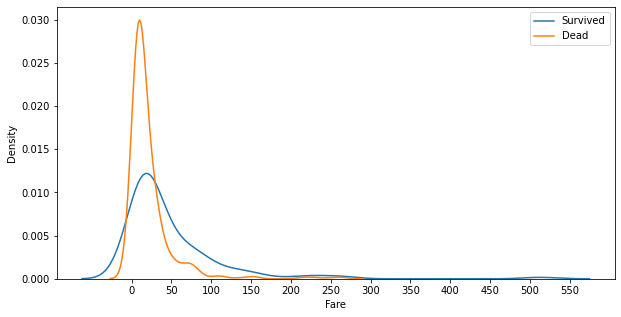

In [88]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x = titanic_df[titanic_df.Survived == 1]['Fare'], ax = ax)
sns.kdeplot(x = titanic_df[titanic_df.Survived == 0]['Fare'], ax = ax)

plt.xticks([i for i in range(0,600,50)])

plt.legend(['Survived', 'Dead'])

plt.show()

### 50이상의 요금을 낸 탑승객의 생존 경향이 사망 경향보다 높은것을 알 수 있었습니다.